# The unstratified Kelvin-Helmholtz instability: numerical approach


## Navid C. Constantinou
## RSES, ANU, 2018

Here we will study the stability of the basic state:

$$
\boldsymbol{u} = U_0\,\mathrm{sign}{(z)}\,\widehat{\boldsymbol{x}}\ ,\quad\rho = \rho_0\textrm{(}=\textrm{const}\textrm{)}.
$$

That is the left cases shown below:

<img src="assets/KH-profiles.png" width=45%>

First we load some packages: `numpy` contains all array operations, special functions and linear algebra operations; `matplotlib` is used for plotting. The `rc(...)` commands are customize the fonts on the plots's labels.

In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size':22})
rc('text', usetex=True)
rc('xtick', labelsize=16) 
rc('ytick', labelsize=16) 
rc('axes', labelsize=20)    # fontsize of the x and y labels
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

Create the physical grid $z$. Our grid points then are: $z=-L_z/2,-L_z/2+\delta, -L_z/2+2\delta,\dots,L_z/2$. For a domain of length $L_z$ with $n_z$ grid points the grid spacing is $\delta=L_z/(n_z-1)$.

(This can be a consistency check to make sure you constructed the grid correctly. You should **thoroughly check every line of your code**. I cannot stress that enough! A mistake or typo can slip in even in the simplest lines of your code! Thourough step-by-step checks of your code as you develop it can save you days of "searching for the bug"...)

Thus, our grid points form an array with elements $z_j = -L_z/2 + (j-1)\delta$, where $j=1,\dots,n_z$.

In [2]:
nz, Lz = 201, 6.0     # use odd nz
z = np.linspace(-Lz/2, Lz/2, nz)
dz = z[1]-z[0]

print("Is the spacing of z what it should be?")
print("dz =", dz)
print("Lz/(nz-1) =", Lz/(nz-1))
if abs(Lz/(nz-1)-dz)<1e-15:
    print("Yes it is!")
else:
    print("Something went wrong...")
    

Is the spacing of z what it should be?
dz = 0.029999999999999805
Lz/(nz-1) = 0.03
Yes it is!


We will approximate the discontinuous basic state $U(z) = U_0\,\mathrm{sign}{(z)}$ with the continuous $U(z) = U_0\,\tanh{(z/h)}$. By taking $h\ll L_z$ the continuous provile approaches the discontinuous one.


The approximation of our continuous basic state on our $z$-grid is the array with elements
$$U_j \equiv U(z_j),\text{ for }j=1,\dots,n_z.$$

Let us see how well the array $U_j$ approximates function $U(z)$ and also how close is that $\tanh$ profile to the discontinuous one.

We shall be thinking of $U_j$ as the elements of a *column* vector: $U(z)\mapsto [U_1,\dots,U_{n_z}]^\mathrm{T}$.

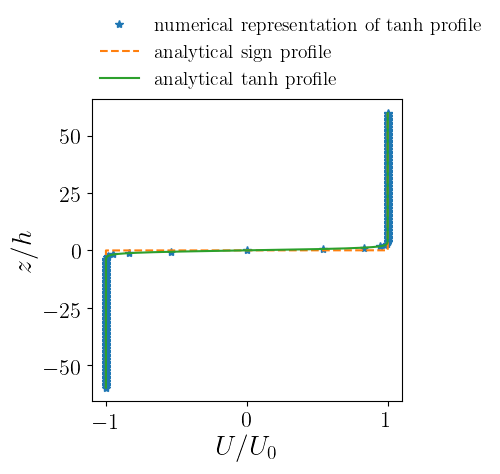

In [3]:
h = 0.05
U0 = 1
U = U0*np.tanh(z/h)

z_cont = np.linspace(-Lz/2, Lz/2, 10*nz)
U_analytic = U0*np.tanh(z_cont/h)

plt.figure(figsize=(4, 4), dpi=100)
plt.plot(U/U0, z/h, '*', label='numerical representation of tanh profile')
plt.plot(np.sign(z_cont), z_cont/h, '--', label='analytical sign profile')
plt.plot(U_analytic/U0, z_cont/h, label='analytical tanh profile')
plt.xlabel("$U/U_0$")
plt.ylabel("$z/h$")
plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), borderaxespad=0, frameon=False, fontsize=14);

Next we want to be able to compute derivatives of functions. For the basic state $U(z)=U_0\tanh(z/h)$ we can, of course, write down the derivative in a blink of an eye. Let us pretend, though, that we do not know the derivative and instead try to compute it numerically. 

(When we are coding something new we should *always* try to start with something we know what the answer should be so we can compare our numerical results. This step may seem obvious, but, nonetheless, it is often overlooked by most people...)



For a function $f(z)$ given by the array $f_j$, the simplest approximation for the array of the derivative $(\mathrm{d}f/\mathrm{d}z)_j$ is the, so called, second-order centered finite differences:

$$
\left(\frac{\mathrm{d}f}{\mathrm{d}z}\right)_j = \frac{f_{j+1}-f_{j-1}}{2\delta},\text{ for }j=2,\dots,n_z-1 .\label{eq:finiteDz_a} \tag{1a}
$$

Note that the above does not hold for the first and last grid-points. There we should do:

$$
\left(\frac{\mathrm{d}f}{\mathrm{d}z}\right)_1 = \frac{f_{2}-f_{1}}{\delta}\quad\textrm{and}\quad\left(\frac{df}{dz}\right)_{n_z} = \frac{f_{n_z}-f_{n_z-1}}{\delta}.\label{eq:finiteDz_b} \tag{1b}
$$

Similarly, the second derivative can be approximated:

$$
\left(\frac{\mathrm{d}^2f}{\mathrm{d}z^2}\right)_j = \frac{f_{j+1}-2f_{j}+f_{j-1}}{\delta^2},\text{ for }j=2,\dots,n_z-1 ,
$$

and for the end-points: $(\mathrm{d}^2f/\mathrm{d}z^2)_1 = (\mathrm{d}^2f/\mathrm{d}z^2)_2$ and $(\mathrm{d}^2f/\mathrm{d}z^2)_{n_z} = (\mathrm{d}^2f/\mathrm{d}z^2)_{n_z-1}$.

Differentiation is a linear operation:

$$ \underbrace{\frac{\mathrm{d}}{\mathrm{d}z}}_{\textrm{operator}} \; f(z) \mapsto \frac{\mathrm{d}f}{\mathrm{d}z} $$
$$ \frac{\mathrm{d}}{\mathrm{d}z} \; \big[ \alpha f(z) +\beta  g(z)\big] \mapsto \alpha \frac{\mathrm{d}f}{\mathrm{d}z} + \beta\frac{df}{dz} $$

and **every** linear operation corresponds to a matrix in a finite-dimensional vector space.

What we are doing here when we have represented functions $f(z)$ as column vectors $[f_1,\dots,f_{n_z}]^\mathrm{T}$

$$ f(z) \mapsto\underbrace{\begin{bmatrix}f_1\\\vdots\\f_{n_z}\end{bmatrix}}_{n_z\times 1 \textrm{ column}}$$

Thus the operation $\dfrac{\mathrm{d}}{\mathrm{d}z}$ can be represented by a matrix:
$$ \frac{\mathrm{d}}{\mathrm{d}z} \mapsto\underbrace{\mathbb{D}_z}_{n_z\times n_z \textrm{ matrix}},$$

so that the column vector that represents $\mathrm{d}f/\mathrm{d}z$ with elements $[(\mathrm{d}f/\mathrm{d}z)_1,\dots,(\mathrm{d}f/\mathrm{d}z)_{n_z}]^\mathrm{T}$ is obtained when we multiply $\mathbb{D}_z$ on the left of the column vector $[f_1,\dots,f_{n_z}]^\mathrm{T}$.

For example, using (1a)-(1b) we can easily read off the matrix that corresponds to $\mathrm{d}/\mathrm{d}z$:

$$\mathbb{D}_z = \frac{1}{2\delta}
\begin{bmatrix}
-2 &  2 & 0 &  & \dots &  \\
-1 &  0 & 1 &   &   &  \\
 0 & -1 & 0 & 1 &   \ddots &   \\
 \vdots &   \ddots & \ddots & \ddots &  \ddots & 0 \\
  &   &   & -1 &     0 & 1 \\
  &   &  & 0 &    -2 & 2  \\
 \end{bmatrix}
$$


**Exercise**: Read off the matrix representation of $\mathrm{d}^2/\mathrm{d}z^2$.

We construct the operators $\mathbb{D}_z$ and $\mathbb{D}^2_z$ through function `create_diffz`:

In [4]:
def create_diffz(nz, dz):
    Dz = np.diag(np.linspace(1, 1, nz-1), +1) - np.diag(np.linspace(1, 1, nz-1), -1)
    Dz[0, 0], Dz[0, 1]= -2, 2
    Dz[-1, -2], Dz[-1, -1] = -2, 2
    Dz = Dz/(2*dz)

    D2z = np.diag(np.linspace(1, 1, nz-1), +1) - 2*np.diag(np.linspace(1, 1, nz)) + np.diag(np.linspace(1, 1, nz-1), -1)
    D2z[0, :] = D2z[1, :]
    D2z[-1, :] = D2z[-2, :]
    D2z = D2z/(dz**2)
    return Dz, D2z

For start let's check if we made any mistakes on defining the function `create_diffz` above. To do that we'll construct `Dz` and `D2z` using `dz=1` and only a few point and look at the matrix elements:

In [5]:
Dz, D2z = create_diffz(5, 1)

print("The d/dz operator")
print(Dz)
print(" ")
print("and the d^2/dz^2 operator")
print(D2z)

The d/dz operator
[[-1.   1.   0.   0.   0. ]
 [-0.5  0.   0.5  0.   0. ]
 [ 0.  -0.5  0.   0.5  0. ]
 [ 0.   0.  -0.5  0.   0.5]
 [ 0.   0.   0.  -1.   1. ]]
 
and the d^2/dz^2 operator
[[ 1. -2.  1.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  1. -2.  1.]]


Looks OK. (But do you think I got it right from the first time? Nope...)

Let's try to compute now $\mathrm{d}U/\mathrm{d}z$ and $\mathrm{d}^2U/\mathrm{d}z^2$ and compare with the analytic expressions.

To get, e.g., $\mathrm{d}U/\mathrm{d}z$ we need to multiply matrix $\mathbb{D}_z$ with vector $[U_1,\dots,U_{n_z}]^{\mathrm{T}}$. Note that we need to do a *proper matrix multiplication*. In `python` matrix multiplications are done with operator `@`.

In [6]:
Dz, D2z = create_diffz(nz, dz)

# Note that in python matrix multiplications are done using @
Uz = Dz @ U
Uzz = D2z @ U

# we construct Uz_analytic and Uzz_analytic on the finer grid z_cont
Uz_analytic = U0/np.cosh(z_cont/h)**2/h
Uzz_analytic = -2*U0*np.tanh(z_cont/h)/np.cosh(z_cont/h)**2/h**2



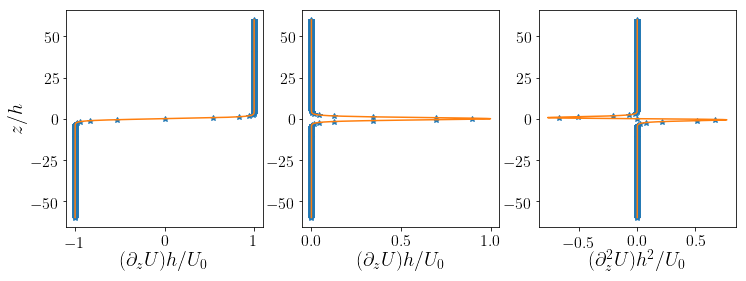

In [7]:
def plot_U_Uz_Uzz():
    f, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0], axs[1], axs[2] = plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), plt.subplot(1, 3, 3)
    axs[0].plot(U/U0, z/h, '*', U_analytic/U0, z_cont/h)
    axs[0].set_xlabel("$(\partial_z U)h/U_0$")
    axs[0].set_ylabel("$z/h$")
    axs[1].plot(Uz*h/U0, z/h, '*', Uz_analytic*h/U0, z_cont/h)
    axs[1].set_xlabel("$(\partial_z U)h/U_0$")
    axs[2].plot(Uzz*h**2/U0, z/h, '*', Uzz_analytic*h**2/U0, z_cont/h)
    axs[2].set_xlabel("$(\partial_z^2 U)h^2/U_0$")
    return f, axs
    
f, axs = plot_U_Uz_Uzz();

Looks pretty good! 

Let's zoom in the vortex sheet region to look more closely how are approximations for the derivatives are doing:

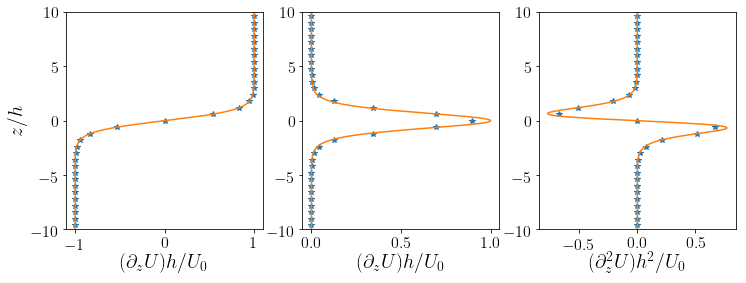

In [8]:
f, axs = plot_U_Uz_Uzz()

# let's zoom in a bit to the area of the vortex sheet
for i in range(3):
    axs[i].set_ylim(-10, 10);

The more points we take for our $z$-grid the better the approximation would be.

Also keep in mind that the second-order finite difference approximation for the derivative is a pretty crude one. There are many better ways to obtain approximation for the derivatives that give much better approximations with the same number of grid-points. But this is outside of the scope of our course here... For the interested reader I'd suggest the book by Trefethen (2000).

So, what have we done up to now? We have a way of representing functions on our discretized grid and also a way to compute derivatives. What's next?

We assume two-dimensional perturbations on the basic state, i.e.:
$$
\boldsymbol{u} = \big[ U_0\,\mathrm{sign}{(z)} + u(x, z, t)\big]\,\widehat{\boldsymbol{x}} + w(x, z, t)\,\widehat{\boldsymbol{z}}\quad,\quad\rho = \rho_0 + \rho(x, z, t),
$$
with the assumption that $|u|, |w|\ll U_0$ and $|\rho|\ll \rho_0$. Using incompresibility $\boldsymbol{\nabla}\boldsymbol{\cdot}\boldsymbol{u}=0$, we write the perturbation flow as

$$
u = -\partial_z\psi\quad\textrm{and}\quad w = \partial_x \psi.
$$

Then, we can show that the linearized equations for the perturbations simplify to:

$$
\partial_t \nabla^2 \psi + U \partial_x \nabla^2 \psi - (\partial_z^2U) \partial_x \psi = 0.\label{eq:Rayleigh} \tag{2}
$$


Because the of homogeneity in $x$ we may search for solutions of the above in the form 
$$
\psi(x, z, t) = \widehat{\psi}(z, t)\,e^{\mathrm{i} k x},
$$
which implies that \eqref{eq:Rayleigh} becomes

$$
\partial_t (\partial_z^2-k^2)\widehat{\psi}_k + \mathrm{i} k U  (\partial_z^2-k^2)\widehat{\psi}_k - \mathrm{i}k(\partial_z^2U) \widehat{\psi}_k = 0. \label{eq:Rayleighk} \tag{3}
$$

This is the equation we want to represent in our grid and study.

In our discrete world, equation (3) becomes:

$$
\partial_t \big(\mathbb{D}_z^2-k^2\mathbb{I}\big) \begin{pmatrix} \widehat{\psi}_{k, 1}\\\vdots\\\widehat{\psi}_{k, n_z}\end{pmatrix} + \mathrm{i} k \underbrace{\begin{pmatrix} U_1 & &\\&\ddots\\& & U_{n_z}\end{pmatrix}}_{\equiv\mathbb{U}}  \big(\mathbb{D}_z^2-k^2\mathbb{I}\big)\begin{pmatrix} \widehat{\psi}_{k, 1}\\\vdots\\\widehat{\psi}_{k, n_z}\end{pmatrix} - \mathrm{i}k \underbrace{\begin{pmatrix} (\mathrm{d}^2U/\mathrm{d}z^2)_1 & &\\&\ddots\\& & (\mathrm{d}^2U/\mathrm{d}z^2)_{n_z}\end{pmatrix}}_{\equiv\mathbb{D_z^2U}} \begin{pmatrix} \widehat{\psi}_{k, 1}\\\vdots\\\widehat{\psi}_{k, n_z}\end{pmatrix} = 0. \label{eq:Rayleighk_discrete} \tag{4}
$$

Above, $\mathbb{I}$ is the $n_z\times n_z$ identity matrix and also we have defined  $\mathbb{U}$ and $\mathbb{D^2_zU}$ as the diagonal $n_z\times n_z$ matrices with elements $U_1,\dots,U_{n_z}$ and $(d^2U/dz^2)_1,\dots,(d^2U/dz^2)_{n_z}$ respectively.

**Important Exercise**: Make sure you understand how to go from (3) to (4).  This is very important! For example, why multiplication with $U(z)$ becomes multiplication with the diagonal matrix $\mathbb{U}$?

We can rewrite (3) in the form: $\partial_t \widehat{\psi}_k = A_k(U)\, \widehat{\psi}_k$ and from that read off the *discrete* representation of the operator $A_k$:

$$
\mathbb{A}_k = -\mathrm{i} k\,(\mathbb{D}^2_z-k^2\mathbb{I})^{-1}\,\big[ \mathbb{U}\,\big(\mathbb{D}^2_z-k^2\mathbb{I}\big) - (\mathbb{D^2_zU})
\big] .$$

Function `construct_Akop` constructs operator $\mathbb{A}_k$.

In [9]:
I = np.eye(nz)

def construct_Akop(k, U):
    laplacian = D2z - k**2*I        # the Laplacian in Fourier space
    invlaplacian = np.linalg.inv(laplacian)  # the inverse Laplacian in Fourier space
    
    Ak = -1j*k*invlaplacian@( np.diag(U)@laplacian - np.diag(D2z@U) )
    return Ak

**Exercise**: What happens if we call `construct_Akop(k, U)` with $k=0$? Can you think of the reason? Is there an issue with our coding strategy or is it something else? How can we fix that?

We have now the operator $\mathbb{A}_k$ in hand. When we are searching for eigenmodes we are looking for solutions $\widehat{\psi}_k(z,t)$ that evolve without changing structure. These solution have the form:

$$
  \widehat{\psi}_k(z,t) = \widetilde{\psi}_k(z)\, e^{\sigma t}. \label{eq:eigensol} \tag{5}
$$

Such solutions can be found by eigenanalysis of operator $A_k$ or equivalently of its discrete analogue $\mathbb{A}_k$. That is,

$$A_k \widetilde{\psi}_k = \sigma \widetilde{\psi}_k.$$

Indeed, we can confirm that if our initial perturbation is in the form of an eigenmode:

$$\widehat{\psi}_k (z,0) = \widetilde{\psi}_k,$$

then $\partial_t \widehat{\psi}_k(z, t) = A_k(U)\, \widehat{\psi}_k(z, t)$ implies that the solution for $t>0$ is (5).

**Exercise**: Confirm the above claim.

Eigenanalysis of $\mathbb{A}_k$ will give us $\sigma$ (as given by our discrete approximation) and also the column vector $[\widetilde{\psi}_{k,1},\dots,\widetilde{\psi}_{k,n_z}]^\mathrm{T}$.


When *at least one* eigen mode appears with eigenvalue $\sigma$ that has $\mathrm{Re}(\sigma)>0$ then we have instability because then in (5) a factor $e^{\mathrm{Re}(\sigma) t}$ appears that grows exponentially.


**Question**: But this implies that something will grow exponentially only if we start off from this special initial condidtion in the form of the eigenfunction. How generic is that?

In `Python` we can use `numpy.linalg.eig()` function to do eigenanalysis of a matrix.

`numpy.linalg.eig(A)` gives out two outputs: `eigvalues` and `eigvectors`.

Let's do first an eigenanalysis of a matrix we know its eigenvalues and eigenvectors to make sure we understand how `numpy.linalg.eig()` works. For example:

$$ A = \begin{bmatrix} -1 & \cot\theta\\0 &-2\end{bmatrix}$$

can be written as:

$$
A =  \left( \begin{bmatrix} 1 & -\cos\theta\\0& \sin\theta \end{bmatrix}\right)^{-1} \begin{bmatrix} -1 & 0\\0 &-2\end{bmatrix} \begin{bmatrix} 1 & -\cos\theta\\0& \sin\theta \end{bmatrix} \label{eq:eigenanalysis}\tag{6}
$$

from which we can read off the eigenvalues $-1$ and $-2$ and the correponding eigenvectors $\begin{bmatrix}1\\0\end{bmatrix}$ and $\begin{bmatrix}-\cos\theta\\\sin\theta\end{bmatrix}$.

In [10]:
theta = np.pi/3

A =np.matrix([[-1, 1/np.tan(theta)], [0, -2]])

print("The test matrix A is:")
print(A)

eigenValues, eigenVectors = np.linalg.eig(A)

print(" ")
print("The eigenValues output from np.linalg.eig(A) is:")
print(eigenValues)

print(" ")
print("The eigenVectors output from np.linalg.eig(A) is:")
print(eigenVectors)

The test matrix A is:
[[-1.          0.57735027]
 [ 0.         -2.        ]]
 
The eigenValues output from np.linalg.eig(A) is:
[-1. -2.]
 
The eigenVectors output from np.linalg.eig(A) is:
[[ 1.        -0.5      ]
 [ 0.         0.8660254]]


This is exactly what we have expected!

Note that eigenvectors can be determined up to a normalization factor so we might get a multiple of the eigenvector we were expecting. (This is because if $\widetilde{\phi}$ is eigenvector of $A$ with eigenvalue $\sigma$ so is $\alpha\widetilde{\phi}$ for any $\alpha$: $A\widetilde{\phi}=\sigma\widetilde{\phi} \Leftrightarrow A(\alpha\widetilde{\phi})=\sigma(\alpha\widetilde{\phi})$.)

`eigenValues` is a list with the eigenvalues. We can convert that to a diagonal matrix with `np.diag(eigenValues)`.

`eigenVectors` is already a list whose columns are the eigenvectors of $A$.

To confirm that we understand what is going on here we first try to reconstruct matrix $A$ from `eigenValues` and `eigenVectors` using the eigendecomposition in (6) above:


In [11]:
A_reconstruction = eigenVectors @ np.diag(eigenValues) @ np.linalg.inv(eigenVectors)

print(A_reconstruction)

[[-1.          0.57735027]
 [ 0.         -2.        ]]


Same as $A$! So we know how to do eigenanalysis. Let's write a function that performs eigenanalysis of $\mathbb{A}_k$ and gives the maximally growing eigenmode as output:

In [12]:
import scipy.linalg

def KHtanh_stab(k):
    # construct matrix A_k given k and vector U
    Ak = construct_Akop(k, U)
    
    # perform eigenanalysis of Ak
    eigenValues, eigenVectors = np.linalg.eig(Ak)
    
    # order the eigenvalues and eigenvectors according to real part
    #(maximum real part comes first)
    idx = np.argsort(-np.real(eigenValues), axis=0)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    # give the eigenvalue with the maximum real part and its corresponding
    # eigenvector as output. 
    # (np.array() constructs a row vetor and we take the transpose .T to output a column vector)
    return eigenValues[0], np.array([eigenVectors[:, 0]]).T

Let's now pick a $k$ and see and compute the unstable eigenvalue of $A_k$:

In [13]:
k = 1.0

sigma, psikeigen = KHtanh_stab(k)

print("The numerical growth rate for k =", k, "is", np.real(sigma), ". (The analytical growth rate is", k*U0, ".)")

The numerical growth rate for k = 1.0 is 0.9119685783254413 . (The analytical growth rate is 1.0 .)


Along with the eigenvalue $\sigma$ we also got the eigenvector $\widehat{\psi}_k(z)$. But remember: we have employed homogeneity in $x$ to Fourier expand $\psi$ in $x$. To visualize the structure of the eigenvector we have to go back to physical space, i.e.

$$\psi = \mathrm{Re}\Big[\widetilde{\psi}_k(z)\,e^{\mathrm{i}kx}\Big].$$

Similarly,

$$ u = \mathrm{Re}\Big[-\partial_z\widetilde{\psi}_k(z)\,e^{\mathrm{i}kx}\Big],\quad w = \mathrm{Re}\Big[\mathrm{i}k\,\widetilde{\psi}_k(z)\,e^{\mathrm{i}kx}\Big],$$
$$ \textrm{vorticity} = \partial_x w - \partial_z u = \mathrm{Re}\Big[(\partial_z^2 - k^2)\widetilde{\psi}_k(z)\,e^{\mathrm{i}kx}\Big].$$

First we construct a $x$ grid and compute the real-valued eigenfunctions on the $(x,z)$ grid.

In [14]:
nx, Lx = nz-1, 4*np.pi
x = np.linspace(0, Lx, nx)

laplacian = D2z - k**2*I

k = 1.0
sigma, psikeigen = KHtanh_stab(k)

# create an (nx x 1) column vector with values exp(i k x_j)
expikx = np.array([np.exp(1j*k*x)]).T
print("expikx is an array of dimension ", expikx.shape, ".")

# note that we multiply an (nz x 1)-column vector with a (1 x nx)-row vector
# on the right to produce an array of dimension (nz x nx)
etahat = 1j*k*psikeigen[np.int((nz-1)/2), :] / sigma 
psihat = psikeigen

# phase = np.exp(-1j*np.pi/2)/etahat[0]
# psihat, etahat = psikeigen*phase/np.max(np.real(psikeigen)), etahat*phase

laplacian = D2z - k**2*I
uhat = -Dz @ psihat
what =  1j*k*psihat
zetahat = laplacian @ psihat

eta = np.real(1/(2*k) * etahat @ expikx.T )
psi = np.real(psihat @ expikx.T )
psi = psi/np.max(psi)
u = np.real( uhat @ expikx.T )
w = np.real( what @ expikx.T )
zeta = np.real( zetahat @ expikx.T )

# ampl=0.02
# psi = ampl*psi + np.real(np.array([-h*np.log(np.cosh(z/h))]).T @ (np.array([np.exp(1j*0*x)]).T).T )
# u = ampl*u + + np.real(np.array([U]).T @ (np.array([np.exp(1j*0*x)]).T).T )
# zeta = ampl*zeta + np.real(np.array([Uz]).T @ (np.array([np.exp(1j*0*x)]).T).T )

expikx is an array of dimension  (200, 1) .


and now plot them:

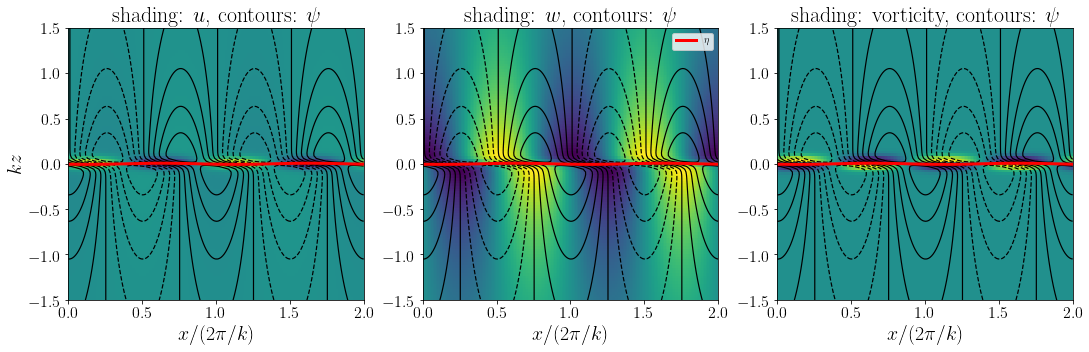

In [15]:
f, axs = plt.subplots(1, 3, figsize=(18, 5))

gs = gridspec.GridSpec(1, 3) 
axs[0], axs[1], axs[2] = plt.subplot(gs[0, 0]), plt.subplot(gs[0, 1]), plt.subplot(gs[0, 2])

axs[0], axs[1], axs[2] = plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), plt.subplot(1, 3, 3)
axs[0].pcolormesh(x/(2*np.pi/k), k*z, u)
axs[0].set_title("shading: $u$, contours: $\psi$", fontsize=22)
axs[0].set_ylabel("$k z$")
axs[1].pcolormesh(x/(2*np.pi/k), k*z, w)
axs[1].set_title("shading: $w$, contours: $\psi$", fontsize=22)
axs[2].pcolormesh(x/(2*np.pi/k), k*z, zeta)
axs[2].set_title("shading: vorticity, contours: $\psi$", fontsize=22)
for i in range(3):
    axs[i].contour(x/(2*np.pi/k), k*z, psi, 11, colors="k", linewidths=1.2)
    axs[i].set_ylim(-1.5, 1.5)
    axs[i].set_xlabel("$x/(2\pi/k)$")
    axs[i].plot(x/(2*np.pi/k), k*eta/10, 'r', linewidth=3, label="$\eta$")
axs[1].legend();

**Exercise**: Are these plot similar to those that we got analytically? Can you explain why there is difference if any? Is it because of our approximation of $\mathrm{sign}(z)$ with $\mathrm{tanh}(z/h)$?

Last, let's compute the maximum growth rate as a function of wavenumber $k$ and compare it with the analytical growth rate that we got for the discontinuous basic state.

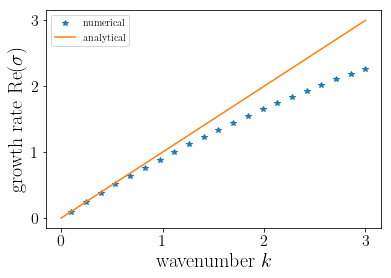

In [16]:
kvec = np.linspace(0.1, 3, 21)
gr = [0 for x in range(np.size(kvec))]
eigvectors = np.zeros((nz, np.size(kvec)))*0j

for ik in range(np.size(kvec)):
    k = kvec[ik]
    sigma, psikeigen = KHtanh_stab(k)
    gr[ik] = np.real(sigma)
    
plt.plot(kvec, gr, '*', label='numerical')
plt.plot(np.append(0, kvec), np.append(0, kvec), label='analytical')
plt.xlabel("wavenumber $k$")
plt.ylabel("growth rate $\mathrm{Re}(\sigma)$")
plt.legend();

### References

- Trefethen, L. N. Spectral methods in MATLAB. Vol. 10. Siam, 2000.